In [1]:
%pip install pandas matplotlib numpy seaborn


[notice] A new release of pip available: 22.3 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
from shutil import rmtree


In [3]:
csv_file = "./dataset/train.csv"
test_csv_file = "./dataset/test.csv"
train_data = pd.read_csv(csv_file)
test_data = pd.read_csv(test_csv_file)
print(train_data.shape)
print( train_data.columns)
print(train_data.info())
print(train_data.isnull().sum().sort_values(ascending=False))
print(train_data.head())

(10407, 13)
Index(['id', 'allelectrons_Total', 'density_Total', 'allelectrons_Average',
       'val_e_Average', 'atomicweight_Average', 'ionenergy_Average',
       'el_neg_chi_Average', 'R_vdw_element_Average', 'R_cov_element_Average',
       'zaratio_Average', 'density_Average', 'Hardness'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10407 entries, 0 to 10406
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     10407 non-null  int64  
 1   allelectrons_Total     10407 non-null  float64
 2   density_Total          10407 non-null  float64
 3   allelectrons_Average   10407 non-null  float64
 4   val_e_Average          10407 non-null  float64
 5   atomicweight_Average   10407 non-null  float64
 6   ionenergy_Average      10407 non-null  float64
 7   el_neg_chi_Average     10407 non-null  float64
 8   R_vdw_element_Average  10407 non-null  float64
 9 

# Feature Engineering

In [4]:
# def process(df):
#     df["BMI"] = df["weight(kg)"] / ((df["height(cm)"] / 100) ** 2)
#     df["HW_Ratio"] = df["height(cm)"] / df["waist(cm)"]
#     df["HA_Ratio"] = df["height(cm)"] / df["age"]
#     return df
# train_data = process(train_data)
# test_data = process(test_data)

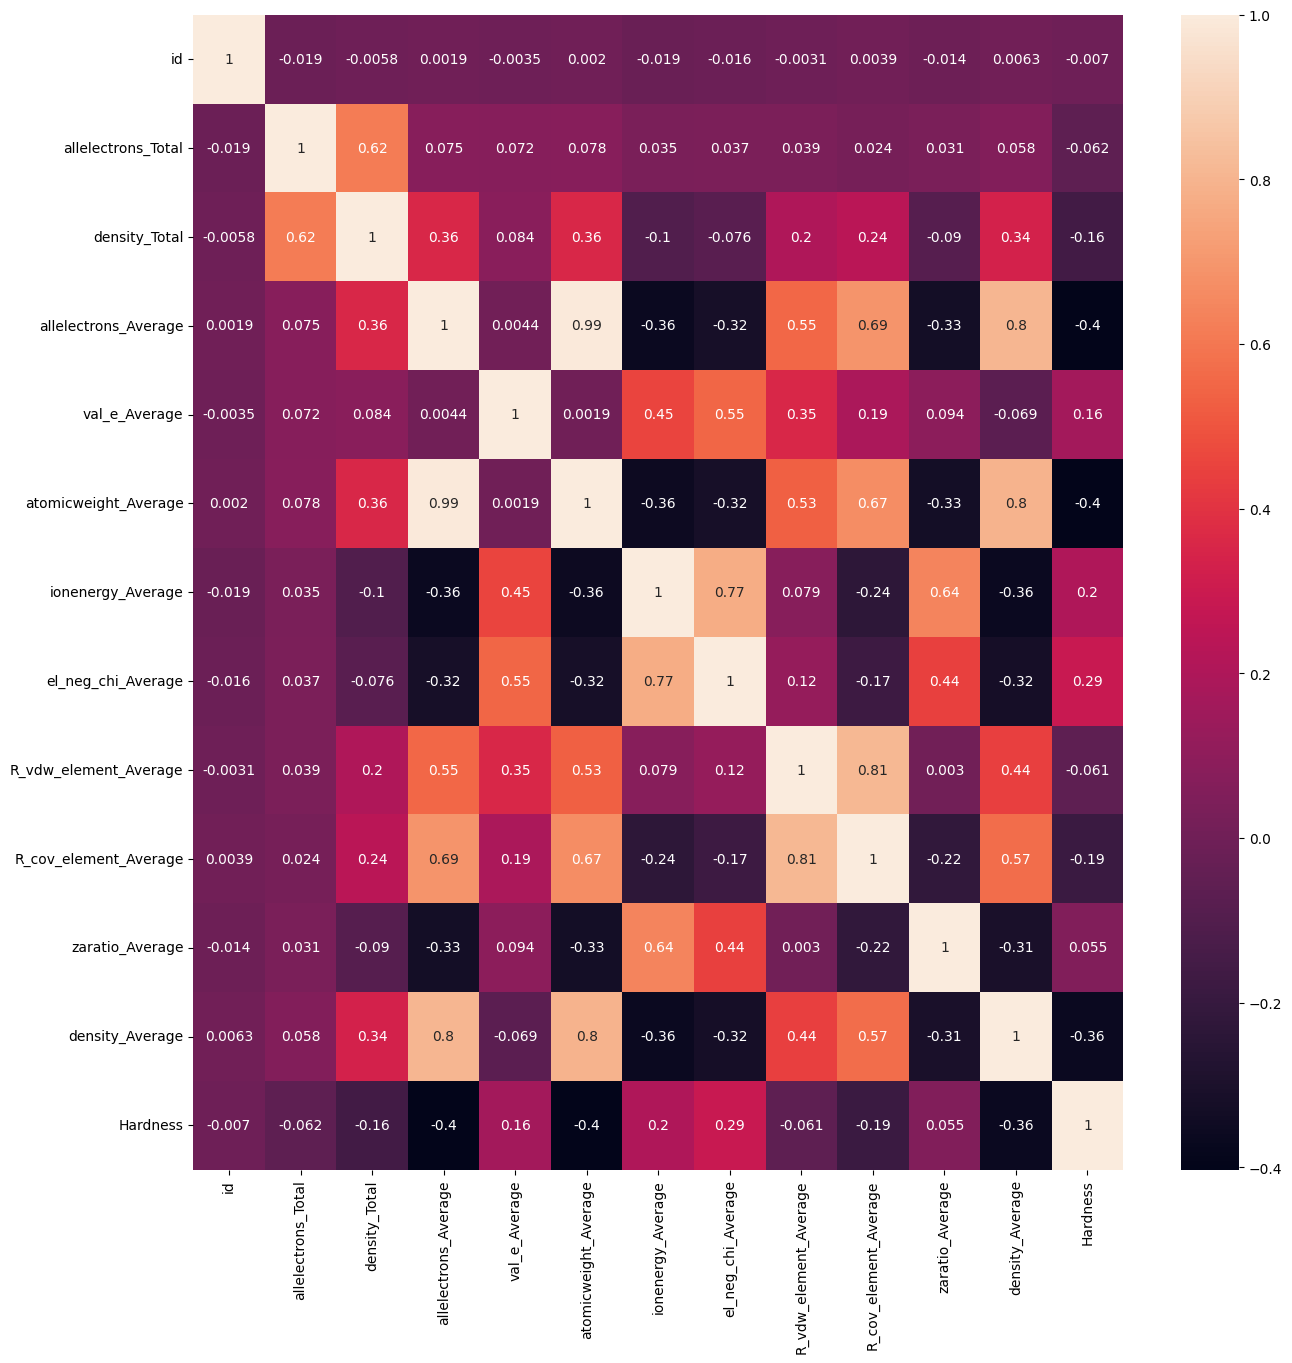

In [5]:
corr = train_data.corr() 
plt.subplots(figsize=(15,15))
sns.heatmap(corr, annot=True) 
plt.savefig("dataCorr.png",bbox_inches='tight')

In [6]:
label = "Hardness"
correlation_matrix = train_data.corr()
target_correlation = correlation_matrix[label].abs()

# Sort by absolute correlation in descending order
sorted_correlation = target_correlation.sort_values(ascending=False)
print(sorted_correlation)

Hardness                 1.000000
atomicweight_Average     0.402948
allelectrons_Average     0.400496
density_Average          0.360780
el_neg_chi_Average       0.290352
ionenergy_Average        0.203203
R_cov_element_Average    0.189111
val_e_Average            0.161715
density_Total            0.161524
allelectrons_Total       0.061687
R_vdw_element_Average    0.061402
zaratio_Average          0.055248
id                       0.006989
Name: Hardness, dtype: float64


In [7]:
relevant_features = target_correlation[target_correlation>0.05] # highly correlated features 

names = [index for index, value in relevant_features.items()] # getting the names of the features 

print(names) # printing the features 
print(len(names))

['allelectrons_Total', 'density_Total', 'allelectrons_Average', 'val_e_Average', 'atomicweight_Average', 'ionenergy_Average', 'el_neg_chi_Average', 'R_vdw_element_Average', 'R_cov_element_Average', 'zaratio_Average', 'density_Average', 'Hardness']
12


In [8]:
temp_data = train_data.copy()
processed_train_data = train_data[names]
names.remove(label)


processed_test_data = test_data[names]

processed_train_data.describe()



,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
count,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000
mean,128.053516,14.491342,17.033222,4.546789,37.507703,10.938308,2.607662,1.731330,0.944132,0.493349,2.132984,4.647126
std,224.123776,15.972877,10.468734,0.690864,26.012313,1.408276,0.334906,0.192481,0.180017,0.063080,1.936656,1.680525
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,68.000000,7.558488,10.000000,4.000000,20.298893,10.590660,2.530000,1.672500,0.864000,0.476196,0.814800,3.000000
50%,100.000000,10.650000,12.600000,4.714286,26.203827,11.202760,2.706000,1.732727,0.915556,0.488550,1.351550,5.500000
75%,131.000000,16.676996,22.000000,4.800000,48.719500,11.670725,2.805000,1.800000,0.981667,0.496070,2.741550,6.000000
max,15300.000000,643.093804,67.000000,6.000000,167.400000,15.245810,3.443000,2.250000,1.615840,0.825990,10.970000,10.000000


In [9]:
# processed_test_data.describe()

In [10]:
def normalize(df):
    return df/df.max()
idColum = test_data["id"]
Hardness = train_data["Hardness"]
processed_train_data = processed_train_data.drop("Hardness", axis=1)
processed_train_data = normalize(processed_train_data)
processed_test_data = normalize(processed_test_data)
processed_train_data["Hardness"] = Hardness
processed_test_data["id"] = idColum
# print(processed_train_data.describe())
print(processed_test_data.describe())

       allelectrons_Total  density_Total  allelectrons_Average  val_e_Average  \
count         6939.000000    6939.000000           6939.000000    6939.000000   
mean             0.012501       0.023004              0.259794       0.757809   
std              0.020518       0.029517              0.164121       0.113860   
min              0.000000       0.000000              0.000000       0.000000   
25%              0.006722       0.011753              0.149254       0.666667   
50%              0.009885       0.016561              0.189055       0.791667   
75%              0.012653       0.025815              0.328358       0.800000   
max              1.000000       1.000000              1.000000       1.000000   

       atomicweight_Average  ionenergy_Average  el_neg_chi_Average  \
count           6939.000000        6939.000000         6939.000000   
mean               0.229527           0.716362            0.757513   
std                0.163347           0.090450            0.

In [11]:
processedDataDirectoryPath = "processedData"
trainCSVPath = os.path.join(processedDataDirectoryPath,'processed_train_data.csv')
testCSVPath = os.path.join(processedDataDirectoryPath,'processed_test_data.csv')
if os.path.isdir(processedDataDirectoryPath):
    rmtree(processedDataDirectoryPath)
os.mkdir(processedDataDirectoryPath)
processed_train_data.to_csv(trainCSVPath, index=False)
processed_test_data.to_csv(testCSVPath, index=False)